<a href="https://colab.research.google.com/github/Sukhwinder9813/ImageCaptioning/blob/master/imagecaptionfinaldep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import re
import pickle
import pandas as pd
import numpy as np
from keras.models import Model,load_model
from keras.applications.resnet50 import ResNet50,preprocess_input 
from keras.preprocessing import image
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import *

In [0]:
model=ResNet50(weights="imagenet",input_shape=(224,224,3))
model_new=Model(model.input,model.layers[-2].output)

In [0]:
#Extract Features for all images
def preprocess_img(img):
  img=image.load_img(img,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  img=preprocess_input(img)
  return img

In [0]:
def encode_image(img):
  img=preprocess_img(img)
  feature_vector=model_new.predict(img)
  feature_vector=feature_vector.reshape((-1,))
  return feature_vector

In [0]:
from google.colab import files

In [0]:
uplod=files.upload()

Saving groupofpeople.jpg to groupofpeople.jpg


In [0]:
model=load_model("/content/drive/My Drive/ImgCapModelmoreTrainagain27.h5")

In [0]:
photo=encode_image("/content/groupofpeople.jpg")
photo2=photo.reshape((1,2048))

In [0]:
photo2.shape

(1, 2048)

In [0]:
word2idx=pd.read_pickle("/content/drive/My Drive/Word2IdxImageCapFinal.pkl")
idx2word=pd.read_pickle("/content/drive/My Drive/Idx2wordImageCapFinal.pkl")

In [0]:
max_len=35

In [0]:
def predict_caption(photo):
  in_text="startseq"
  for i in range(max_len):
    sequence=[word2idx[w] for w in in_text.split() if w in word2idx.keys()]
    sequence=pad_sequences([sequence],maxlen=max_len,padding='post')
    ypred=model.predict([photo,sequence],verbose=0)
    ypred=ypred.argmax()
    word=idx2word[ypred]
    in_text += " "+word
    if word =="endseq":
      break
  final_caption=in_text.split()[1:-1]
  final_caption=" ".join(final_caption)
  return final_caption

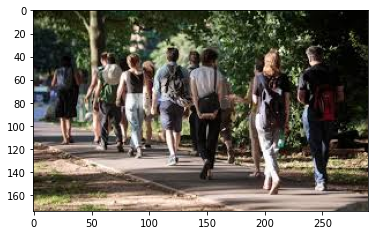

In [0]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread("/content/groupofpeople.jpg")
img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

In [0]:
pred=predict_caption(photo2)

In [0]:
print(pred)

group of people are riding bicycles in competition
